<a href="https://colab.research.google.com/github/lawan94/KaggleCompetition/blob/main/tweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.libraries

In [7]:
pip install tweet-preprocessor


In [6]:
pip install contractions

In [8]:
#Manipulate data
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np


#text preprocessing

import preprocessor as p
import spacy
import gensim
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download("punkt")
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import re, string, unicodedata
from nltk.tokenize import word_tokenize
import contractions
from collections import Counter
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow import keras
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer,  text_to_word_sequence

#classifiers
from keras.utils import to_categorical
import tensorflow.keras as k
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
trainTweet = pd.read_csv("/content/drive/MyDrive/KaggleCompet/NLP/nlp-getting-started/train.csv")
testTweet = pd.read_csv("/content/drive/MyDrive/KaggleCompet/NLP/nlp-getting-started/test.csv")

#2. Overwiew of the data set

In [21]:
print(trainTweet.head()) #print first sows
# 2 features are important for us : text and target


   id keyword  ...                                               text target
0   1     NaN  ...  Our Deeds are the Reason of this #earthquake M...      1
1   4     NaN  ...             Forest fire near La Ronge Sask. Canada      1
2   5     NaN  ...  All residents asked to 'shelter in place' are ...      1
3   6     NaN  ...  13,000 people receive #wildfires evacuation or...      1
4   7     NaN  ...  Just got sent this photo from Ruby #Alaska as ...      1

[5 rows x 5 columns]


In [22]:
print(trainTweet.value_counts())


id     keyword     location                        text                                                                                                                   target
10833  wrecked     Lincoln                         @engineshed Great atmosphere at the British Lion gig tonight. Hearing is wrecked. http://t.co/oMNBAtJEAO               0         1
3598   desolation  Stockholm, Sweden               ? This Weekend: Stockholm Sweden - Aug 8 at Copperfields http://t.co/6un7xC9Sve                                        1         1
3583   desolate    Michigan, USA                   Psalm34:22 The Lord redeemeth the soul of his servants: and none of them that trust in him shall be desolate.          0         1
3584   desolate    Boulder                         @joshacagan Your only option now is to move to an desolate island with nothing but a stack of DVDs you canÛªt watch.  0         1
3587   desolate    Temporary Towers                @fotofill It looks so desolate. End of the w

# 3.Preprocessing

In [23]:

print("text data before cleaning \n")
print(trainTweet.text)
print("\n" + "\n")
print("after cleaning , it's look like that" + "\n")

#getting all the texts 
texts = trainTweet.text
cleaned_texts = texts.apply(p.clean)
cleaned_texts = cleaned_texts.str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')

print(cleaned_texts)


text data before cleaning 

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object



after cleaning , it's look like that

0       our deeds are the reason of this may allah for...
1                   forest fire near la ronge sask canada
2       all residents asked to shelter in place are be...
3          people receive evacuation orders in california
4       just got sent

# Collections of stopwords to be removed from the corpus

In [24]:
sp = spacy.load('en_core_web_sm')
allSTOPWORD = list()

#spacy stopwords
spacy_stopwords = list(sp.Defaults.stop_words) 
print(len(spacy_stopwords))

#NLTK stopwords
nltk_stopwords = list(stopwords.words("english"))
print(len(set(nltk_stopwords)))

#Gensim stopwords
gensim_stopwords = list(gensim.parsing.preprocessing.STOPWORDS)


#try to stack them 
print(len(gensim_stopwords))

allSTOPWORD.extend(gensim_stopwords)
spacy_stopwords.extend(nltk_stopwords)

allSTOPWORD.extend(spacy_stopwords)
print(len(spacy_stopwords))
#print(len(allSTOPWORD)) #we have 13926 stopwords
# set to get unique stopwords
allSTOPWORD = list(set(allSTOPWORD))
print(len(allSTOPWORD)) #



326
179
337
505
413


In [25]:
myStopWords1 = "a able about above abst accordance according accordingly across" \
"act actually added adj affected affecting affects after afterwards " \
"again against ah all almost alone along already also although always "\
"am among amongst an and announce another any anybody anyhow anymore anyone"\
"anything anyway anyways anywhere apparently approximately are aren arent arise "\
"around as aside ask asking at auth available away awfully b back be became because "\
"become becomes becoming been before beforehand begin beginning beginnings begins behind "\
"being believe below beside besides between beyond biol both brief briefly but by c ca came"\
"can cannot can't cause causes certain certainly co com come comes contain containing contains "\
"could couldnt d date did didn't different do does doesn't doing done don't down downwards due "\
"during e each ed edu effect eg eight eighty either else elsewhere end ending enough especially "\
"et et-al etc even ever every everybody everyone everything everywhere ex except f far few ff fifth first" \
"five fix followed following follows for former formerly forth found four from further furthermore g gave get "\
"gets getting give given gives giving go goes gone got gotten h had happens hardly has hasn't have haven't having "\
"he hed hence her here hereafter hereby herein heres hereupon hers herself hes hi hid him himself his hither home "\
"how howbeit however hundred i id ie if i'll im immediate immediately importance important in inc indeed index "\
"information instead into invention inward is isn't it itd it'll its itself i've j just k keep	keeps kept kg km" \
"know known knows l largely last lately later latter latterly least less lest let lets like liked likely line little" \
"'ll look looking looks ltd m made mainly make makes many may maybe me mean means meantime meanwhile merely mg might "\
"million miss ml more moreover most mostly mr mrs much mug must my myself n na name namely nay nd near nearly necessarily "\
"necessary need needs neither never nevertheless new next nine ninety no nobody non none nonetheless noone nor normally nos "\
"not noted nothing now nowhere o obtain obtained obviously of off often oh ok okay old omitted on once one ones only onto or "\
"ord other others otherwise ought our ours ourselves out outside over overall owing own p page pages part particular particularly "\
"past per perhaps placed please plus poorly possible possibly potentially pp predominantly present previously primarily probably "\
"promptly proud provides put q que quickly quite qv r ran rather rd re readily really recent recently ref refs regarding "\
"regardless regards related relatively research respectively resulted resulting results right run s said same saw say saying says sec section"\
"see seeing seem seemed seeming seems seen self selves sent seven several shall she shed she'll shes should shouldn't "\
"show showed shown showns shows significant significantly similar similarly since six slightly so some somebody somehow someone "\
"somethan something sometime sometimes somewhat somewhere soon sorry specifically "\
"specified specify specifying still stop strongly sub substantially successfully such sufficiently suggest sup sure"\


myStopWords2 = "I a about an are as at be by com for from how  in is it of on or that the this to was what when where   who will with the www"\
"a's	able	about	above	according accordingly	across	actually	after	afterwards again	against	ain't	all	allow allows	almost	alone"\
"along	already also	although	always	am	among amongst	an	and	another	any anybody	anyhow	anyone	anything	anyway anyways	anywhere"\
"apart	appear	appreciate appropriate	are	aren't	around	as aside	ask	asking	associated	at available	away	awfully	be	became because"\
"become	becomes	becoming	been before	beforehand	behind	being	believe below	beside	besides	best	better between	beyond	both	brief	but"\
"by	c'mon	c's	came	can can't	cannot	cant	cause	causes certain	certainly	changes	clearly	co com	come	comes	concerning	consequently "\
"consider	considering	contain	containing	contains corresponding	could	couldn't	course	currently definitely	described	despite	did	didn't "\
"different	do	does	doesn't	doing don't	done	down	downwards	during each	edu	eg	eight	either else	elsewhere	enough	entirely	especially et	"\
"etc	even	ever	every everybody	everyone	everything	everywhere	ex exactly	example	except	far	few fifth	first	five	followed	following "\
"follows	for	former	formerly	forth four	from	further	furthermore	get gets	getting	given	gives	go goes	going	gone	got	gotten greetings	"\
"had	hadn't	happens	hardly has	hasn't	have	haven't	having he	he's	hello	help	hence her	here	here's	hereafter	hereby herein	hereupon"	\
"hers	herself	hi him	himself	his	hither	hopefully how	howbeit	however	i'd	i'll i'm	i've	ie	if	ignored immediate	in	inasmuch	inc	indeed "\
"indicate	indicated	indicates	inner	insofar instead	into	inward	is	isn't it	it'd	it'll	it's	its itself	just	keep	keeps	kept know	known	"\
"knows	last	lately later	latter	latterly	least	less lest	let	let's	like	liked likely	little	look	looking	looks ltd	mainly	many	may	maybe "\
"me	mean	meanwhile	merely	might more	moreover	most	mostly	much must	my	myself	name	namely nd	near	nearly	necessary	need needs	neither	"\
"never	nevertheless	new next	nine	no	nobody	non none	noone	nor	normally	not nothing	novel	now	nowhere	obviously of	off	often	oh	ok okay	"\

"old	on	once	one ones	only	onto	or	other others	otherwise	ought	our	ours ourselves	out	outside	over	overall own	particular	particularly"	\
"per	perhaps placed	please	plus	possible	presumably probably	provides	que	quite	qv rather	rd	re	really	reasonably regarding	"\
"regardless	regards	relatively	respectively right	said	same	saw	say saying	says	second	secondly	see seeing	seem	seemed"	\
"seeming	seems seen	self	selves	sensible	sent serious	seriously	seven	several	shall she	should	shouldn't	since	six so	"\
"some	somebody	somehow	someone something	sometime	sometimes	somewhat	somewhere soon	sorry	specified	specify	specifying" \
"still	sub	such	sup	sure t's	take	taken	tell	tends th	than	thank	thanks	thanx that	that's	thats	the	their theirs	"\
"them	themselves	then	thence there	there's	thereafter	thereby	therefore therein	theres	thereupon	these	they they'd	they'll	"\
"they're	they've	think third	this	thorough	thoroughly	those though	three	through	throughout	thru thus	to	together	too	took "\
"toward	towards	tried	tries	truly try	trying	twice	two	un under	unfortunately	unless	unlikely	until unto	up	upon	us	use used	"\
"useful	uses	using	usually value	various	very	via	viz vs	want	wants	was	wasn't way	we	we'd	we'll	we're we've	welcome	well	went"	\

"which	while	whither	who who's	whoever	whole	whom	whose why	will	willing	wish	with within	without	won't	wonder	would wouldn't	yes	yet	"\
"whereby wherein	whereupon	wherever whether"\
"you	you'd you'll	you're	you've	your	yours yourself	yourselves	zero" "were weren't	what	what's	whatever	when whence	whenever where	where's	whereafter whereas"
	



myStopWords = myStopWords1 +  " " + myStopWords2
myStopWords = list(set(myStopWords.split()))
print((len(myStopWords)))
print(allSTOPWORD)

allSTOPWORD.extend(myStopWords)
STOP_WORDS = list(set(allSTOPWORD)) #keeping uniques stop words

print(len(set(allSTOPWORD))) # 735 stopwords

566
["'re", 'nobody', 'nor', 'through', "you're", 'with', 'she', 'any', 'beforehand', 'thus', 'whereas', 'because', 'shan', 'own', 'why', 'an', 'too', 'themselves', 'weren', 'really', 'thereafter', "that'll", 'these', 'un', 'our', 'sincere', "needn't", 'again', 'may', 'everywhere', 'sixty', 'various', 'computer', 'above', 'bill', 'latter', 'me', 'further', 'therein', "hasn't", 'himself', 'hasnt', 'did', 'whom', 'move', 'below', 'make', 'seemed', 'thence', 'o', 'whether', 'anything', 'onto', "wasn't", 'needn', 'afterwards', 'km', "'d", 'or', 'doing', 'get', 'several', 'within', 'whereafter', 'almost', '‘re', 'already', 'yourselves', "n't", 'just', 'hadn', 'were', 'has', 'often', 'without', 'hasn', 'be', 's', 'both', 'what', 'describe', "won't", 'however', 'top', "weren't", 'n’t', 'ever', 'wouldn', 'than', 'whereupon', '‘ll', 'been', 'upon', 'fify', 'somehow', "shouldn't", 'fire', 'same', 'that', 'in', "you'd", 'anywhere', 'mill', '’d', 'mine', 'much', 'am', 'was', 'thick', 'become', '‘v

#Removing frequentWords

Frequent words are common words of a particular domain.
If we are working on any problem statement for a specific field, 
we can ignore common words in that domain because those frequent 
words don't give too much information.
Implementation of frequent words removing
Here we use the "Counter" function from the collection library to remove our corpus's frequent words.

In [26]:
## Implementation of frequent words removing
def freq_words(text):
	"""
	Return :- Most frequent words
	Input :- string
	Output :-
	"""
	# tokenization
	tokens = word_tokenize(text)
	for word in tokens:
		counter[word]= +1

	FrequentWords = []
	# take top 10 frequent words
	for (word, word_count) in counter.most_common(10):
		FrequentWords.append(word)

	return FrequentWords


# initiate object for counter
counter = Counter()
# some random text on machine learning
ex_fw = cleaned_texts[0]
# calling count_fw to calculate frequent words
FrequentWords = freq_words(ex_fw)
#print(f"Top 10 Frequent Words from our example text :- \n{FrequentWords}")

FrequentWords = cleaned_texts.apply(freq_words)
FrequentWords


0       [our, deeds, are, the, reason, of, this, may, ...
1       [our, deeds, are, the, reason, of, this, may, ...
2       [our, deeds, are, the, reason, of, this, may, ...
3       [our, deeds, are, the, reason, of, this, may, ...
4       [our, deeds, are, the, reason, of, this, may, ...
                              ...                        
7608    [our, deeds, are, the, reason, of, this, may, ...
7609    [our, deeds, are, the, reason, of, this, may, ...
7610    [our, deeds, are, the, reason, of, this, may, ...
7611    [our, deeds, are, the, reason, of, this, may, ...
7612    [our, deeds, are, the, reason, of, this, may, ...
Name: text, Length: 7613, dtype: object

#Removing of Rare words
- Removing rare words text preprocessing technique is similar to eliminating
- frequent words. We can remove more irregular words from the corpus.

In [27]:
def rare_words(text):
	"""
	Return :- Most Rare words
	Input :- string
	Output :- list of rare words
	"""
	# tokenization
	tokens = word_tokenize(text)
	for word in tokens:
		counter[word]= +1

	RareWords = []
	number_rare_words = 10
	# take top 10 frequent words
	frequentWords = counter.most_common()
	for (word, word_count) in frequentWords[:-number_rare_words:-1]:
		RareWords.append(word)

	return RareWords

RareWords = cleaned_texts.apply(rare_words)

#Implementation of removing of emoticons
To remove emotions from the text, we need a list of emoticons; in this GitHub Repo, we can find all emoticons as a dictionary

- use regular expressions to remove open and close
- double brackets and anything in between them 
- we assume this is necessary based on our sample text.
- replacing contractions with their expansions can be beneficial at this point, since 
- our word tokenizer will split words like "didn't" into "did" and "n't.
- It's not impossible to remedy this tokenization at a later stage, but 
- doing so prior makes it easier and more straightforward.

In [55]:
def remove_emojis(text):
  text = re.sub("["u"\U0001F600-\U0001F64F"  # emoticons
          u"\U0001F300-\U0001F5FF"  # symbols & pictographs
          u"\U0001F680-\U0001F6FF"  # transport & map symbols
          u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
          u"\U00002500-\U00002BEF"  # chinese char
          u"\U00002702-\U000027B0"
          u"\U00002702-\U000027B0"
          u"\U000024C2-\U0001F251"
          u"\U0001f926-\U0001f937"
          u"\U00010000-\U0010ffff"
          u"\u2640-\u2642"
          u"\u2600-\u2B55"
          u"\u200d"
          u"\u23cf"
          u"\u23e9"
          u"\u231a"
          u"\ufe0f"  # dingbats
          u"\u3030"
          "]+", ' ', text) 
  text = re.sub(r'\d+', '', text) #removing numbers
  text = re.sub(r':.*$', ":",text) # removing url  
  text = re.sub('\[[^]]*\]', '', text) 
  text = contractions.fix(text) #
  text = re.sub(r'\s{4}', '', text)    
  return text 

def filterStopWords(text):
  tokens = word_tokenize(text) # create tokens
  tokens = [word.lower() for word in tokens if word not in string.punctuation or word.isdigit()] # making words lowercase
  filteredWords = [lemmatizer.lemmatize(token) for token in tokens if token  not in STOP_WORDS]
  #FrequentWords = cleaned_texts.apply(freq_words)

  #filteredWords = [token for token in filteredWords if token not in FrequentWords]
  return " ".join(filteredWords)




In [56]:
#let’s remove the whitespace from the beginning of the text. The whitespace consists of four spaces.

lemmatizer = WordNetLemmatizer()


# Implementation of removing punctuations using string library

from string import punctuation


 
def clean_and_remove_stopWords(text):
  text = remove_emojis(text)
  return filterStopWords(text)
 
 
  

corpus = trainTweet.text.apply(clean_and_remove_stopWords)
corpus_test = testTweet.text.apply(clean_and_remove_stopWords)

corpus

0                    deed reason earthquake allah forgive
1                             forest la ronge sask canada
2       resident asked 'shelter place notified officer...
3       people receive wildfire evacuation order calif...
4           photo ruby alaska smoke wildfire pours school
                              ...                        
7608    giant crane holding bridge collapse nearby hom...
7609    aria_ahrary thetawniest control wild fire cali...
7610                                                   m.
7611    police investigating e-bike collided car portu...
7612                                               latest
Name: text, Length: 7613, dtype: object

## Tokenisation
- Transform each text in a list of tokens, converted into identifiers, using the NLTK library's `wordpunct_tokenize` function. 
- Use the `get` method of the` dictionary` variable to convert tokens into identifiers. 
- Words not found in the vocabularies must be replaced by the identification of the token `" <PAD> "`.

- Visualize the distribution of the number of tokens by text with a histogram, thanks to the `hist` function of the Matplotlib library (` matplotlib.pyplot`).

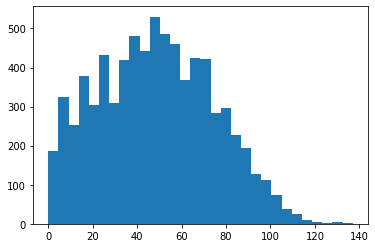

137
its look like a very sparse matrix


(7613, 13398)

In [57]:
length = [len(corpus[i]) for i in range(len(corpus))]
plt.hist(length, bins=30)
plt.show()
print(np.max(length))

count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(corpus)

# transform the training and validation data using count vectorizer object
feature_1Transformed =  count_vect.transform(corpus)
#xvalid_count =  count_vect.transform(valid_x)
print("its look like a very sparse matrix")
feature_1Transformed.toarray().shape

#3.1 Count vectorizer

Count Vector is a matrix notation of the dataset in which every row represents a document from the corpus, every column represents a term from the corpus, and every cell represents the frequency count of a particular term in a particular document

In [58]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', min_df=10)
count_vect.fit(corpus)

X_cv = count_vect.transform(corpus)
Xtest_cv = count_vect.transform(corpus_test)

y = trainTweet.target


print(X_cv.shape, Xtest_cv.shape)

(7613, 1054) (3263, 1054)


#3.2 Tf-idf

TF-IDF score represents the relative importance of a term in the document and the entire corpus based on two terms: the first computes the normalized Term Frequency (TF), the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)
IDF(t) = log_e(Total number of documents / Number of documents with term t in it)

In [59]:
tfidf_vect = TfidfVectorizer(min_df=3)
tfidf_vect.fit(corpus)

X_tf = tfidf_vect.transform(corpus)


#3.3 Word embeddings
A word embedding is a form of representing words and documents using a dense vector representation. The position of a word within the vector space is learned from text and is based on the words that surround the word when it is used. Word embeddings can be trained using the input corpus itself or can be generated using pre-trained word embeddings such as Glove, FastText, and Word2Vec

In [60]:

from keras.preprocessing.text import Tokenizer,  text_to_word_sequence

NUM_WORDS=10000 # on garde seulement les 20 tokens les plus fréquents
t = Tokenizer(num_words=NUM_WORDS,oov_token="<OOV>")
t.fit_on_texts(texts)
sequences = t.texts_to_sequences(texts)

word_index = t.word_index
print('Found %s unique tokens.' % len(word_index))
vocabulary_size=min(len(word_index)+1,NUM_WORDS)


max_length = 452

X = pad_sequences(sequences,
                  maxlen=max_length,
                  truncating="post",
                  padding="post" 
            )

Found 22701 unique tokens.


In [61]:
Xtrain,Xtest, ytrain, ytest = train_test_split(X_cv, y, test_size=.2)
#Xtrain,Xtest, ytrain, ytest = train_test_split(X, y, test_size=.1)

def mlModel(classifier, Xtrain,ytrain, Xtest, ytest):
  clf = classifier
  clf.fit(Xtrain, ytrain)
  return clf.score(Xtest, ytest)

mlModel(MultinomialNB(), Xtrain, ytrain, Xtest, ytest)

0.7760998030203545

## Convolutional neural network design

Design the network architecture in sequential mode with the Keras API of the TensorFlow library (`tensorflow.keras`). The network must have the following layers:

- Input layer (`layer.Input`)
- Word representation layer
- Parallel convolution layers (`layers.Conv1D`)
  - Sub-sampling layer (`layers.GlobalMaxPooling1D`) after each convolution layer
- Concatenation layer ("layer.concatenate")
- Regularization layer by dropout (`layers.Dropout`)
- Dense layer with softmax activation (`layers.Dense`)

Configure the word representation layer to use pre-trained representations without updating them (`weights` and` trainable` arguments).

Provide filters of width 2, 3, 4 and 5, with 50 filters per width.

In [50]:
import tensorflow.keras as k

filter_sizes = [2, 3]
n_filters = 100

# Couche d'entrée
word_input = k.layers.Input(shape=(max_length, ))
# Couche de représentation des mots
embedding_layer = k.layers.Embedding(input_dim=(vocabulary_size),
                                     output_dim=300,trainable=False)(word_input)
# Couches de convolutions en parallèle
pooled_outputs = []
for size in filter_sizes:
  convolution_layer = k.layers.Conv1D(n_filters, # nombre de filtres pour cette taille
                                      kernel_size=size, # largeur du filtre
                                      activation="tanh")(embedding_layer)
  # Couche de sous-échantillonnage
  pooled_output = k.layers.GlobalMaxPooling1D()(convolution_layer)
  pooled_outputs.append(pooled_output)
# Concaténation des attributs calculés par convolution + sous-échantillonnage
feature_map = k.layers.Concatenate()(pooled_outputs) # vecteur réel de taille n_filters * len(filter_sizes)
# Couche de régularisation
dropout_layer = k.layers.Dropout(0.5)(feature_map)
# Couche dense pour la classification
classification_layer = k.layers.Dense(units=2,
                                      activation="softmax")(dropout_layer)

In [63]:
# Instanciation du modèle

#inputs -> wordinput
#outputs -> classifLayer
def compileModel(inputs, outputs, optimizer="RMSprop"):
  model = k.Model(inputs=inputs, outputs=outputs)
  model.compile(loss="categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"])
  model.summary()
  return model




#Splitting the data into test and validation data.

def deepModel(modelName, X, y, ts1=0.5, ts2=0.2, batch_size=1, epochs=10):
  Xtrain,x_temp,ytrain,y_temp= train_test_split(X,y,test_size= ts1)
  Xtest,Xval,ytest,yval = train_test_split(Xtrain,ytrain, test_size = ts2)
  modelName.fit(x=Xtrain, y=ytrain, validation_data=(Xval, yval), batch_size=batch_size, epochs=epochs)
  print("prediction for the test fold")
  print(modelName.evaluate(Xtest, ytest))
  return modelName, (Xtest, ytest)

cnnModel = compileModel(word_input, classification_layer)
cnnModel_, (Xtest, ytest) = deepModel(cnnModel, X,ydeep)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 452)]        0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 452, 300)     3000000     input_10[0][0]                   
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 451, 100)     60100       embedding_7[0][0]                
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 450, 100)     90100       embedding_7[0][0]                
____________________________________________________________________________________________